In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<BarContainer object of 5 artists>

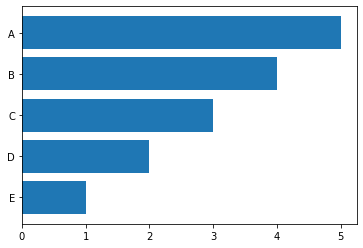

In [2]:
fig, ax = plt.subplots()

labels = ["E", 'D', 'C', 'B', 'A']
data = [1, 2, 3, 4, 5]

ax.barh(labels, data)

In [3]:
housing_raw = pd.read_csv('data/housing_data.csv',
                          parse_dates=['period_begin', 'period_end'],
                          dtype = {'total_homes_sold':"Int32", 'region_name':'category'})

housing_raw.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
0,"Appling County, GA",2020-04-27,2020-07-19,<NA>,1.0,1.0,222.7,136195.8,NaN
1,"Tooele County, UT",2018-08-27,2018-11-18,325,NaN,NaN,NaN,NaN,NaN
2,"Johnson County, TX",2019-09-23,2019-12-15,577,717.0,778.0,63.0,268737.6,17.095583
3,"Holmes County, OH",2017-10-09,2017-12-31,22,52.0,54.0,109.4,115308.3,34.050000
4,"Madison County, FL",2017-01-09,2017-04-02,12,54.0,55.0,151.2,158062.5,38.300000


In [4]:
ca_housing = (
    housing_raw
    .loc[housing_raw['region_name'].str.contains("CA")]
    .assign(region_name = housing_raw['region_name'].str[0:-11])
    .set_index('period_begin')
    .sort_index()
    
)

In [5]:
total_sold = (
    ca_housing
    .groupby('region_name')
    .agg({'total_homes_sold':'sum'})
    .sort_values("total_homes_sold", ascending = False)
    .iloc[:10]
)

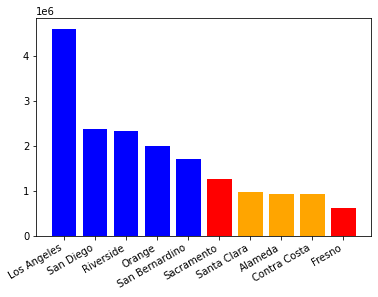

In [6]:
fig, ax = plt.subplots()

colors = [
    'blue',
    'blue',
    'blue',
    'blue',
    'blue',
    'red',
    'orange',
    'orange',
    'orange',
    'red'
]

ax.bar(x = total_sold.index, 
       height = total_sold['total_homes_sold'],
       color = colors)

plt.setp(ax.xaxis.get_majorticklabels(), rotation=30, ha = 'right')

plt.show()

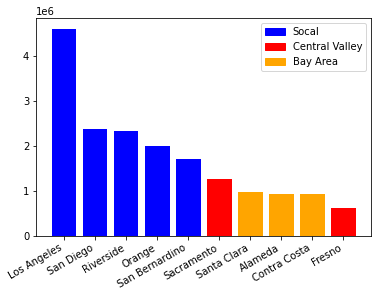

In [7]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots()

colors = [
    'blue',
    'blue',
    'blue',
    'blue',
    'blue',
    'red',
    'orange',
    'orange',
    'orange',
    'red'
]

ax.bar(x = total_sold.index, 
       height = total_sold['total_homes_sold'],
       color = colors)

socal = mpatches.Patch(color='blue', label='Socal')
central = mpatches.Patch(color='red', label='Central Valley')
bay = mpatches.Patch(color='orange', label = 'Bay Area')

plt.legend(handles=[socal, central, bay], loc = 'upper right')

plt.setp(ax.xaxis.get_majorticklabels(), rotation = 30, ha = 'right')

plt.show()

## Stacked bar chart

In [8]:
ca_or_filter = housing_raw.loc[housing_raw['region_name'].str[-2:].isin(['CA', 'OR', 'WA'])]

In [15]:
ca_or1 = (
    ca_or_filter
    .assign(
        price_range = pd.cut(
            ca_or_filter.loc[:, 'median_active_list_price'],
            [0, 400_000, 600_000, 2_000_000],
            labels = ['0-400k', '400k-600k', '600k+']
        ),
        state = ca_or_filter['region_name'].str[-2:]
    )
)

In [16]:
ca_or = (
    ca_or1
    .query("period_end == '2021-08-01'")
    .pivot_table(index = 'price_range', columns = 'state', values = 'inventory', aggfunc='sum')
)

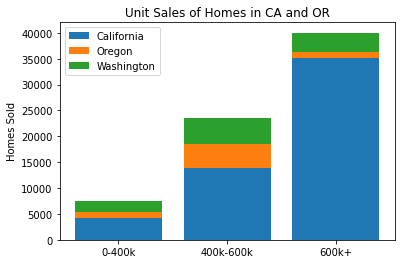

In [17]:
fig, ax = plt.subplots()

ax.bar(
    ca_or.index,
    ca_or['CA'],
    label = 'California'
)

ax.bar(
    ca_or.index,
    ca_or['OR'],
    label = 'Oregon',
    bottom=ca_or['CA']
)

ax.bar(
    ca_or.index,
    ca_or['WA'],
    label = 'Washington',
    bottom = ca_or['CA'] + ca_or['OR']
)

ax.set_title('Unit Sales of Homes in CA and OR')
ax.set_ylabel('Homes Sold')

ax.legend()

plt.show()

## Grouped bar charts

In [12]:
import seaborn as sns

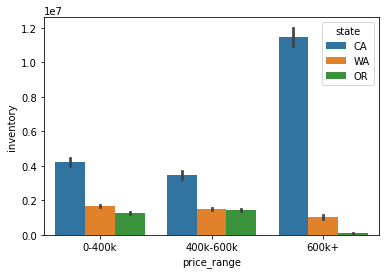

In [19]:
sns.barplot(
    x = 'price_range',
    y = 'inventory',
    hue = 'state',
    estimator = sum,
    data = ca_or1
)

plt.show()

<AxesSubplot:xlabel='price_range'>

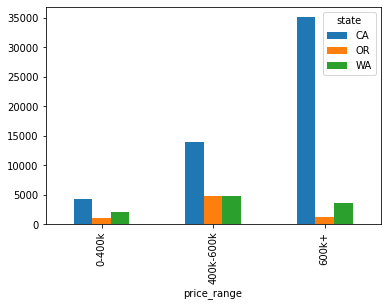

In [21]:
ca_or.plot.bar()

In [22]:
import numpy as np

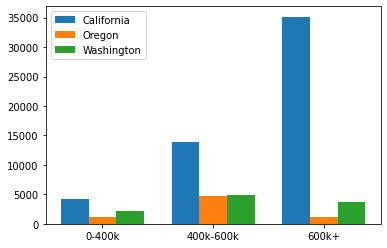

In [25]:
fig, ax = plt.subplots()

width = 0.25

x1 = np.arange(len(ca_or))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]

ax.bar(
    x1,
    ca_or['CA'],
    width = width,
    label = 'California'
)

ax.bar(
    x2,
    ca_or['OR'],
    width = width,
    label = 'Oregon'
)
ax.bar(
    x3,
    ca_or['WA'],
    width = width,
    label = 'Washington'
)

plt.xticks(
    x2,
    ca_or.index
)

ax.legend()

plt.show()

In [24]:
ca_or

state,CA,OR,WA
price_range,,,
0-400k,4267.0,1074.0,2143.0
400k-600k,13877.0,4711.0,4858.0
600k+,35147.0,1229.0,3649.0


# Pie charts

In [26]:
sales_total = (
    ca_housing
    .query('region_name in ["San Francisco", "Los Angeles", "Sa Diego"]')
    .groupby('region_name')
    .agg({'total_homes_sold':'sum'})
)

Text(0.5, 1.0, 'Share of home sales select CA market')

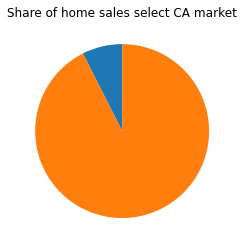

In [27]:
fig, ax = plt.subplots()

ax.pie(x = sales_total.iloc[:, 0][::-1],
       startangle = 90)

ax.set_title("Share of home sales select CA market")